# Путь к файлу

Путь (от англ. path) — набор символов, показывающий расположение файла или каталога в файловой системе.

В операционных системах UNIX разделительным знаком при записи пути является «/» (слеш), в Windows — «\» (обратный слеш). Эти знаки служат для разделения названия каталогов, составляющих путь к файлу. Все вы видели, например, такой путь на ОС Windows: C:\Program Files. Это и есть путь до папки Program Files.

Существует два типа пути:

- абсолютный;
- относительный.

Абсолютный путь всегда считается от «корня», той папки, откуда потом «вырастают» все остальные папки. Для Windows это диск С:, D: и т. д., для Unix это “/”. Абсолютный путь всегда уникальный.

Абсолютный путь — это путь, который указывает на одно и то же место в файловой системе, вне зависимости от текущего рабочего каталога или других обстоятельств. Его ещё называют полным.

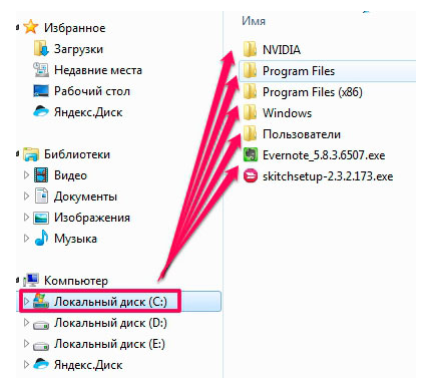

Относительный путь — это путь по отношению к текущему рабочему каталогу пользователя.

Чтобы поработать с путями, есть модуль os. Функция os.chdir() позволяет нам изменить директорию, которую мы в данный момент используем. Если вам нужно знать, какой путь вы в данный момент используете, для этого нужно вызвать os.getcwd().

Примечание: Все дальнейшие пути указаны для конкретной машины на ОС Linux. У вас эти результаты будут отличаться.

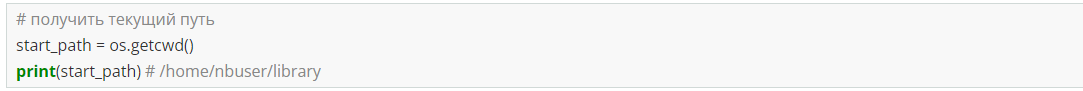

Далее попробуем подняться на директорию выше:

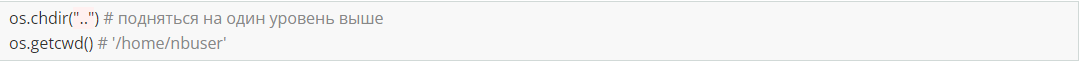

Теперь вернемся в ту директорию, из которой стартовали. Изначально мы сохраняли её в переменной start_path.

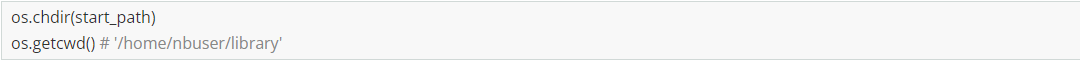

### С помощью функции os.listdir() можно получить весь список файлов, находящихся в директории. Если не указать никаких аргументов, то будет взята текущая директория.

In [1]:
print(os.listdir()) # ['SnapchatLoader', 'FBLoader', 'tmp.py', '.gitignore', 'venv', '.git']

if 'tmp.py' not in os.listdir():
    print("Файл отсутствует в данной директории")

NameError: name 'os' is not defined

Для того чтобы склеивать пути с учётом особенностей ОС, следует использовать функцию os.path.join(). Это связано с тем, что в разных операционных системах могут быть разные разделители каталогов, например в ОС Windows этим разделителем является «\», а в Linux — «/», как мы и говорили в начале юнита. Поэтому, чтобы поиск файла проходил гладко в обеих системах (ведь ваш скрипт могут запускать на любой системе в связи с кросс-платформенностью Python), лучше всё-таки использовать os.path.join().

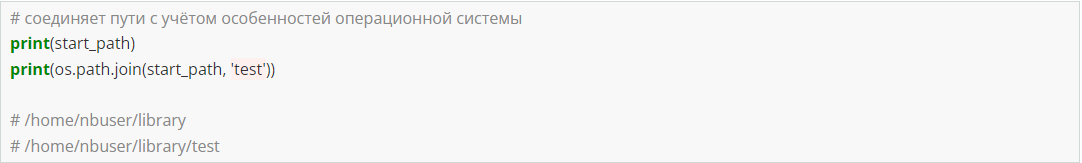

### Задание 7.3

Задание на самопроверку.

Сделайте функцию, которая принимает от пользователя путь и выводит всю информацию о содержимом этой папки. Для реализации используйте функцию встроенного модуля os.walk(). Если путь не указан, то сравнение начинается с текущей директории.

In [2]:
import os

def walk_desc(path=None):
    start_path = path if path is not None else os.getcwd()

    for root, dirs, files in os.walk(start_path):
        print("Текущая директория", root)
        print("---")

        if dirs:
            print("Список папок", dirs)
        else:
            print("Папок нет")
        print("---")

        if files:
            print("Список файлов", files)
        else:
            print("Файлов нет")
        print("---")

        if files and dirs:
            print("Все пути:")
        for f in files:
            print("Файл ", os.path.join(root, f))
        for d in dirs:
            print("Папка ", os.path.join(root, d))
        print("===")

walk_desc()

Текущая директория d:\IDE\Skillfactory\Project_homework\15. Принципы ООП в Python и отладка кода
---
Список папок ['archive']
---
Список файлов ['1. Принципы ООП.ipynb', '2. Объекты и классы.ipynb', '3. Атрибуты и методы.ipynb', '4. Практические примеры.ipynb', '5. Проверка знаний.ipynb', '7. Применение ООП для работы с файлами.ipynb']
---
Все пути:
Файл  d:\IDE\Skillfactory\Project_homework\15. Принципы ООП в Python и отладка кода\1. Принципы ООП.ipynb
Файл  d:\IDE\Skillfactory\Project_homework\15. Принципы ООП в Python и отладка кода\2. Объекты и классы.ipynb
Файл  d:\IDE\Skillfactory\Project_homework\15. Принципы ООП в Python и отладка кода\3. Атрибуты и методы.ipynb
Файл  d:\IDE\Skillfactory\Project_homework\15. Принципы ООП в Python и отладка кода\4. Практические примеры.ipynb
Файл  d:\IDE\Skillfactory\Project_homework\15. Принципы ООП в Python и отладка кода\5. Проверка знаний.ipynb
Файл  d:\IDE\Skillfactory\Project_homework\15. Принципы ООП в Python и отладка кода\7. Применение 

# Работа с файлами

Python «из коробки» располагает достаточно широким набором инструментов для работы с файлами. Для того чтобы начать работать с файлом, надо его открыть с помощью команды специальной функции open.

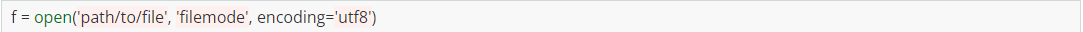

Результатом этой операции будет файл, в котором указатель текущей позиции поставлен на начало или конец файла.

Перед тем, как мы начнём разбирать аргументы, хотелось бы заранее отметить, что указателем называется скорее метка, которая указывает на определённое место в файле. Указателей в классическом понимании программиста, как, например, в C или C++ в Python нет!

Давайте по порядку разберём все аргументы:

1. path/to/file — путь к файлу может быть относительным или абсолютным. Можно указывать в Unix-стиле (path/to/file) или в Windows-стиле (path\to\file).

2. filemode — режим, в котором файл нужно открывать.

Записывается в виде строки, может принимать следующие значения:

- r — открыть на чтение (по умолчанию);

- w — перезаписать и открыть на запись (если файла нет, то он создастся);

- x — создать и открыть на запись (если уже есть — исключение);

- a — открыть на дозапись (указатель будет поставлен в конец);

- t — открыть в текстовом виде (по умолчанию);

- b — открыть в бинарном виде.

3. encoding — указание, в какой кодировке файл записан (utf8, cp1251 и т. д.) По умолчанию стоит utf-8. При этом можно записывать кодировку как через дефис, так и без: utf-8 или utf8.

Открытие файла на запись является блокирующей операцией, то есть она останавливает работу нашей программы до того, пока файл не откроется.

Теперь давайте поговорим про то, как записывать какую-либо информацию в файл.

При открытии файла внутри него ставится указатель текущей позиции для чтения. При открытии в режиме чтения ('r') или записи ('w') указатель ставится на начало, в режиме 'a' (добавление новых записей в конец файла) — в конец.

Откроем файл на запись и с помощью метода write запишем в него строку. В качестве результата метод write возвращает количество записанных символов.

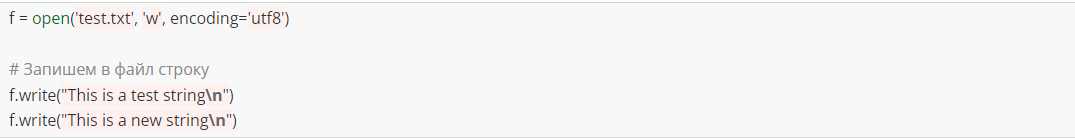

После вызова команды write ваши данные не сразу попадут и сохранятся в файл. Связано это с особенностями внутренней работы операционных систем. Если для вас критично своевременное попадание информации на жесткий диск компьютера, то после записи вызывайте f.flush() или закрывайте файл. Закрыть файл можно с помощью метода close().

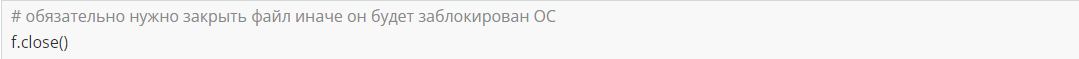

Теперь давайте посмотрим, как читать данные из файла.

Откроем файл для чтения, в который только что записали две строки:

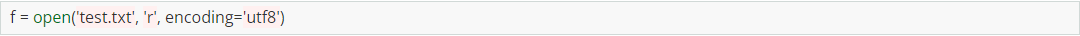

Вот его содержимое на жестком диске:

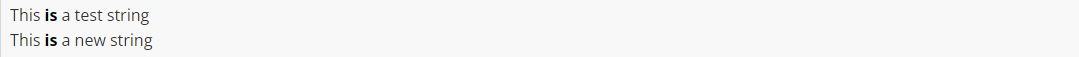

После того, как файл открыт для чтения, мы можем читать из него данные.

f.read(n) — операция, читающая с текущего места n символов, если файл открыт в t режиме, или n байт, если файл открыт в b режиме, и возвращающая прочитанную информацию.

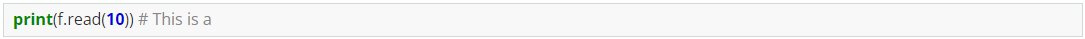

После прочтения указатель на содержимое остается на той позиции, где чтение закончилось. Если n не указать, будет прочитано «от печки», то есть от текущего места указателя и до самого конца файла.

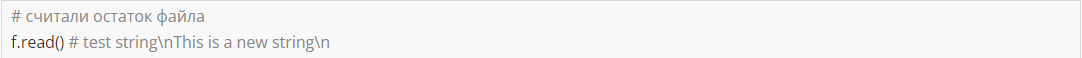

После работы обязательно закрываем файл:

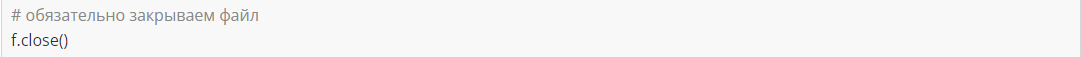

# Чтение и запись построчно

Зачастую с файлами удобнее работать построчно, поэтому для этого есть отдельные методы:

- writelines — записывает список строк в файл;
- readline — считывает из файла одну строку и возвращает её;
- readlines — считывает из файла все строки в список и возвращает их.

Метод f.writelines(sequence) не будет сам за вас дописывать символ конца строки ('\n'), поэтому при необходимости его нужно прописать вручную.

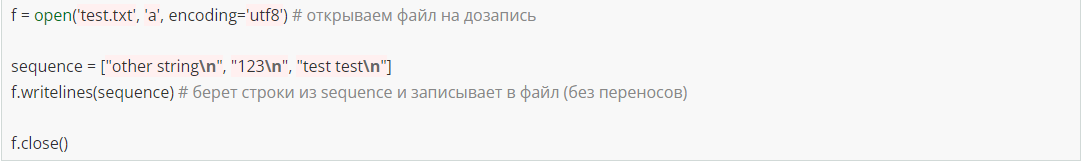

Попробуем теперь построчно считать файл с помощью readlines:

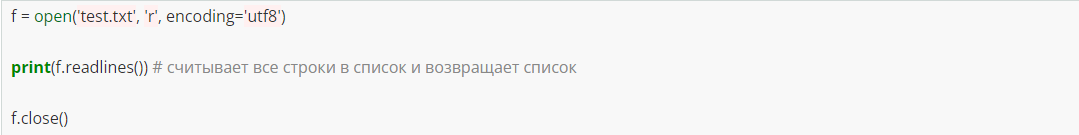

Метод f.readline() возвращает строку (символы от текущей позиции до символа переноса строки \n, который остаётся в конце строки и опускается только в последней строке файла, если файл не заканчивается новой строкой):

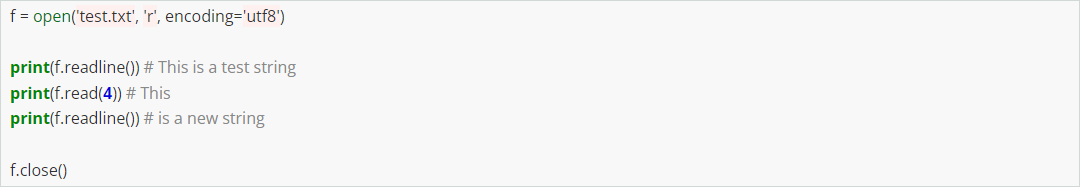

### Задание 7.4

Задание на самопроверку.

Создайте любой файл на операционной системе под название input.txt и построчно перепишите его в файл output.txt.

In [1]:
import os.path
import codecs
os.path.join('/tmp/l', 'temp.file')#конкатенция путей

'/tmp/l\\temp.file'

In [2]:
import os
os.path.join(os.getcwd(), 'tmp.txt', 'tmp2.txt') 

'd:\\IDE\\Skillfactory\\Project_homework\\15. Принципы ООП в Python и отладка кода\\tmp.txt\\tmp2.txt'

In [3]:
os.path.dirname('/tmp/l/temp.file') #Имя каталога по заданному пути

'/tmp/l'

In [4]:
os.path.basename('tmp/l/temp.file') #Имя файла позаданнному пути

'temp.file'

In [5]:
os.path.normpath('tmp////l///temp.file') #нормализация пути

'tmp\\l\\temp.file'

In [6]:
os.path.exists('tmp/l/temp.file') #существует ли путь?

False

In [7]:
os.listdir()

['1. Принципы ООП.ipynb',
 '2. Объекты и классы.ipynb',
 '3. Атрибуты и методы.ipynb',
 '4. Практические примеры.ipynb',
 '5. Проверка знаний.ipynb',
 '7. Применение ООП для работы с файлами.ipynb',
 'archive',
 'test.txt',
 'tmp']

In [27]:
os.path.exists('test.txt')

True

In [28]:
f = open('test.txt', 'w', encoding='utf8')
f.tell()

0

In [29]:
f.write('This is a test string\n')

22

In [30]:
f.tell() # количество символов

23

In [31]:
f.close() # Запись данных и закрытие файла

In [32]:
f = open('test.txt', 'r', encoding='utf8')
f.tell()

0

f.read(n) - операция читающая с текущего места n символов, если фаил открыт в t режиме, или n байт, если фаил открыт в b режиме, и возвращающая прочитанную информацию

In [33]:
f.read()

'This is a test string\n'

In [34]:
f.tell()

23

### Указатель можно перемещать вручну. по файлу с помощью функции

f.seek(offset[, from_whar=0)

Аргумент from_what:

- 0 - с начала файла
- 1 - с того места, где мы сейчас (только для и режима)
- 2 - с конца файла (только для b режима)

In [35]:
f.seek(1) # на второй символ с начала

1

In [36]:
f.tell()

1

In [37]:
f.seek(-2,2) #работает только в b режиме

UnsupportedOperation: can't do nonzero end-relative seeks

In [38]:
f.close()

# Чтение и запись построчно


In [43]:
f = open('test.txt', 'a', encoding='utf8')

In [44]:
sequence = ['other string\n', '123\n', 'test test\n' ]

f.writelines(sequence) # берёт строки из sequence и записывает в фаил (без переносов)

f.close()

# f.readlines() считывает все строки в список и возвращает их

In [46]:
f = open('test.txt', 'r', encoding='utf8')
print(f.readlines()) #считывает все строки в список и возвращает их
f.close()

['This is a test string\n', 'other string\n', '123\n', 'test test\n']


In [47]:
f = open('test.txt', 'r', encoding='utf8')

print(f.readline()) # This is a test string
print(f.read(4)) # This
print(f.readline()) # is a new string

f.close()

This is a test string

othe
r string



# Файл как итератор

Объект файл является итератором, поэтому его можно использовать в цикле for.

Для чего это нужно?

Итераторы представляют собой такой объект, который вычисляет какие-то действия на каждом шаге, а не все сразу. На примере файла это выглядит примерно так. Предположим, у вас есть огромный текстовый файл, который весит несколько гигабайт. Если попытаться разом считать его полностью с помощью f.readlines(), то он будет загружен в вашу программу, в то время как переменная, в которую будет записан файл, станет весить столько же, сколько и объём считанного файла.

В большинстве задач с обработкой текста он весь сразу не нужен, поэтому мы можем, например, считывать его построчно, обрабатывать строку и забывать из нашей программы, чтобы считать новую. Тогда весь файл огромного объема не будет «висеть» в памяти компьютера.

### Не стоит считывать файл полностью — в большинстве задач с обработкой текста весь файл разом читать не требуется. В таком случае с файлом работают построчно

![image.png](attachment:image.png)

Цикл for, как мы помним, — это цикл, который перебирает по очереди.

In [48]:
f = open('test.txt')  # можно перечислять строки в файле
for line in f:
    print(line, end='')

# This is a test string
# This is a new string
# other string
# 123
# test test

f.close()

This is a test string
other string
123
test test


# Менеджер контекста with

После работы с файлом его необходимо закрыть с помощью метода close(). Файл освобождается для операционной системы (если он был открыт для записи), и другие приложения могут получать к нему доступ. Если не закрыть файл явно, то информация, записываемая в него, может быть утеряна, или файл может повредиться.

Для явного указания места работы с файлом, а также чтобы не забывать закрывать файл после обработки, существует менеджер контекста with.

![image.png](attachment:image.png)

Тело менеджера контекста определяется одним отступом вправо относительно отступов ключевого слова with. Менеджер контекста неявно вызывает закрытие файла после работы, что освобождает вас от забот о том, закрыли ли вы файл или нет. Закрытие файла происходит при любом стечении обстоятельств, даже если внутри with будет ошибка. 

В дальнейшем мы научимся писать собственные структуры, работающие похожим образом.

In [49]:
# В блоке менеджера контекста открытый файл «жив» и с ним можно работать, при выходе из блока - файл закрывается.
with open("test.txt", 'rb') as f:
    a = f.read(10)
    b = f.read(23)

f.read(3) # Error!

ValueError: read of closed file

# Задание 7.4

Задание на самопроверку.

Создайте любой файл на операционной системе под название input.txt и построчно перепишите его в файл output.txt.

In [3]:
with open("input.txt", "r") as input_file:
    with open("output.txt", "w") as output_file:
        for line in input_file:
            output_file.write(line)

# Задание 7.5
Задание на самопроверку.

Дан файл numbers.txt, компоненты которого являются действительными числами (файл создайте самостоятельно и заполните любыми числам, в одной строке одно число). Найдите сумму наибольшего и наименьшего из значений и запишите результат в файл output.txt.

In [1]:
filename = 'numbers.txt'
output = 'output.txt'

with open(filename) as f:
    min_ = max_ = float(f.readline())  # считали первое число
    for line in f:
        num =  float(line)
        if num > max_:
            max_ = num
        elif num < min_:
            min_ = num

    sum_ = min_ + max_

with open(output, 'w') as f:
    f.write(str(sum_))
    f.write('\n')

# Задание 7.6
Задание на самопроверку.

В текстовый файл построчно записаны фамилии и имена учащихся класса и их оценки за контрольную. Подсчитайте количество учащихся, чья оценка меньше 3 баллов. Cодержание файла:

In [33]:
with open("familii.txt", 'r', encoding='utf8') as f:
    count = 0
    for line in f:
        points = int(line.split()[-1])
        if points < 3:
            count += 1
    print(count)

4


# Задание 7.7
Задание на самопроверку.

Выполните реверсирование строк файла (перестановку строк файла в обратном порядке).

In [41]:
with open("input.txt", 'r', encoding='utf8') as f:
    x = f.readline()
    with open("output.txt", "w") as output_file:
        output_file.write(x[::-1])